**Project 2: Neural Networks_Regression_California housing price predictor**

In [85]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [86]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [87]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [88]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [89]:
len(X_train_full)

15480

In [90]:
len(X_test)

5160

In [91]:
len(X_valid)

3870

In [92]:
len(X_train)

11610

In [93]:
# Convert X_train into a DataFrame with attribute names
df_train = pd.DataFrame(X_train, columns=housing.feature_names)

# Print the DataFrame
print(df_train.head())  # Print the first few rows of the DataFrame


     MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0 -0.193979 -1.077813 -0.943385  ... -0.572916  0.929260  -1.422155
1  0.751983 -1.868895  0.405478  ...  0.205165 -0.916547   1.096670
2 -0.414691  0.029701  0.818088  ... -0.299833  1.308729  -1.697027
3  1.718896 -1.315138  0.326644  ... -0.111466 -0.982134   0.941742
4 -0.962072 -1.236030 -0.056258  ... -0.302570 -0.804112   1.326562

[5 rows x 8 columns]


In [94]:
np.random.seed(42)
tf.random.set_seed(42)

## Define Model Architecture

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])  # keras.layers.Dense(10, activation="relu"),removed 1 layer
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6143 - val_loss: 1.4123
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7482 - val_loss: 0.6386
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6207 - val_loss: 0.6071
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5820 - val_loss: 0.5736
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5561 - val_loss: 0.5447
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5349 - val_loss: 0.5193
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5168 - val_loss: 0.4971
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5012 - val_loss: 0.4781
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4879 - val_loss: 0.4618
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4763 - val_loss: 0.4478
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4664 - val_loss: 0.4361
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

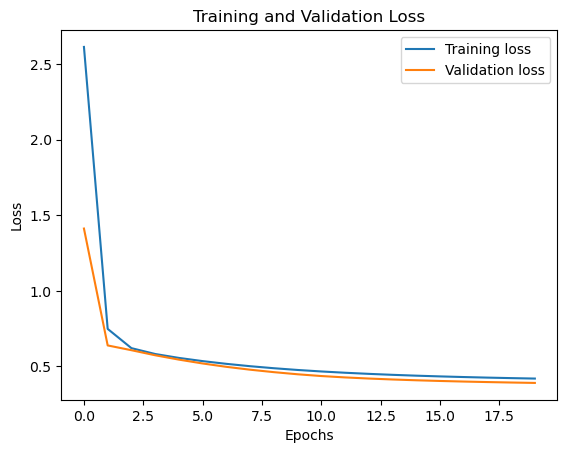

In [96]:
# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

## Let us evaluate the model testing performance

In [97]:
# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4136


In [98]:
# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Sample 1:
Predicted: 0.521012008190155
Actual: 0.477
Sample 2:
Predicted: 1.74845290184021
Actual: 0.458
Sample 3:
Predicted: 3.4811367988586426
Actual: 5.00001
